In [1]:
import numpy as np
import copy
from classic_fib import FibCode
import networkx as nx 
import rustworkx as rx 
def mprintboard(matrix, L= 4):
    if matrix.shape == ((L**2)//2,):
        matrix.shape = (L//2,L)
        print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in matrix]))
        matrix.shape =  ((L**2)//2,)
    else:
        print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in matrix])) 
    
def syn_meas(check_matrix, board):
    return np.matmul(check_matrix, board)%2
    

In [2]:

codeword = np.zeros(8, dtype = int)
codeword[1:4] = 1
codeword[6] = 1
print("Codeword:")
mprintboard(codeword)
print(codeword.shape)

werror = copy.deepcopy(codeword)
werror[4] = 1
print("W/ Error")
mprintboard(werror)


Codeword:
0	1	1	1
0	0	1	0
(8,)
W/ Error
0	1	1	1
1	0	1	0


In [3]:
fstabilizer = np.array([[1,1,1,0,0,1,0,0],
 [1,0,0,0,1,1,0,1],
 [0,1,0,0,1,1,1,0],
 [0,0,1,0,0,1,1,1]], dtype=int)

werror.shape = (8,)

In [4]:
L = 4
f = FibCode(L) 

fund_syndr = f._calc_syndrome(fstabilizer, werror)

In [5]:
hori_stab_faces = copy.deepcopy(f.fundamental_symmetry)
hori_stab_faces.shape = (f.L**2)//2 #
hori_stab_faces = f.shift_by_x(f.shift_by_y(hori_stab_faces),  power=(-f.L//2) + 1)
hori_stab_faces_rect = np.reshape(hori_stab_faces, (f.L//2, f.L))
hori_check_matrix, hori_parity_rows_to_faces  = f.generate_check_matrix_from_faces(hori_stab_faces_rect)  # TODO make a special +y/x for check mats

In [6]:
hori_matching_graph = f.ret2net(f.generate_error_syndrome_graph(hori_check_matrix, f.no_bits))

print(hori_matching_graph)

0
1
2
3
4
5
6
7
MultiGraph with 4 nodes and 8 edges


In [7]:
import pymatching as pm

hori_matching = pm.Matching(hori_matching_graph) # TODO add weights 

In [8]:
hori_syndrome_mat = f._calc_syndrome(hori_check_matrix, werror)
print(hori_syndrome_mat)

[1 0 0 1]


In [9]:
hori_net = hori_matching.to_networkx()

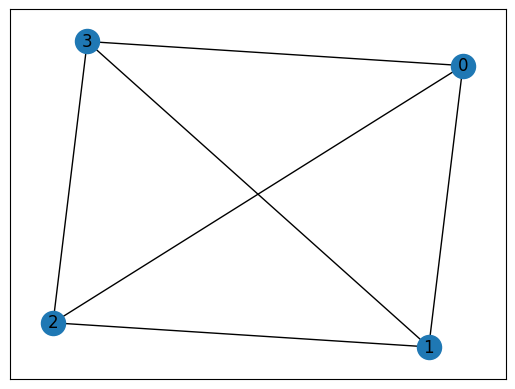

In [10]:
nx.draw_networkx(hori_net)

In [11]:
len(f.fundamental_single_error_syndromes)

8

In [12]:
len(nx.edges(hori_net))

6

In [13]:
hori_prediction = hori_matching.decode(hori_syndrome_mat) 
print(hori_prediction)

[]


In [27]:
nxgraph = hori_matching.to_networkx()

In [29]:
len(nxgraph.edges)

6